In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



In [65]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
oc = pd.read_csv("Option Code Information file for UNT - Final(Sheet1)_2.csv")
oc.shape

(48304, 10)

In [5]:
cd = pd.read_csv(r"Claim Information file for UNT_21.csv")
cd.shape

(123361, 4)

In [6]:
oc.head()

Truck  Style  Attribute 1  Attribute 2  Attribute 3  Attribute 4  \
0      1      1            1           83          181          204   
1      2      1            2           84          181          205   
2      3      1            2           84          181          205   
3      4      1            2           84          181          205   
4      5      1            2           84          181          205   

   Attribute 5  Attribute 6  Attribute 7  Attribute 8  
0          264          281          290          294  
1          265          282          291          295  
2          265          282          291          295  
3          265          282          291          295  
4          265          282          291          295

In [7]:
attr_cols = [c for c in oc.columns if "Attr" in c]

for i in attr_cols:
    print(i)
    print("----")


    print( oc[i].min(), "-", oc[i].max() , "\nUnique values: ", oc[i].nunique())
    print("------")

Attribute 1
----
1 - 82 
Unique values:  82
------
Attribute 2
----
83 - 180 
Unique values:  98
------
Attribute 3
----
181 - 203 
Unique values:  23
------
Attribute 4
----
204 - 263 
Unique values:  60
------
Attribute 5
----
264 - 280 
Unique values:  17
------
Attribute 6
----
281 - 289 
Unique values:  9
------
Attribute 7
----
290 - 293 
Unique values:  4
------
Attribute 8
----
294 - 315 
Unique values:  22
------


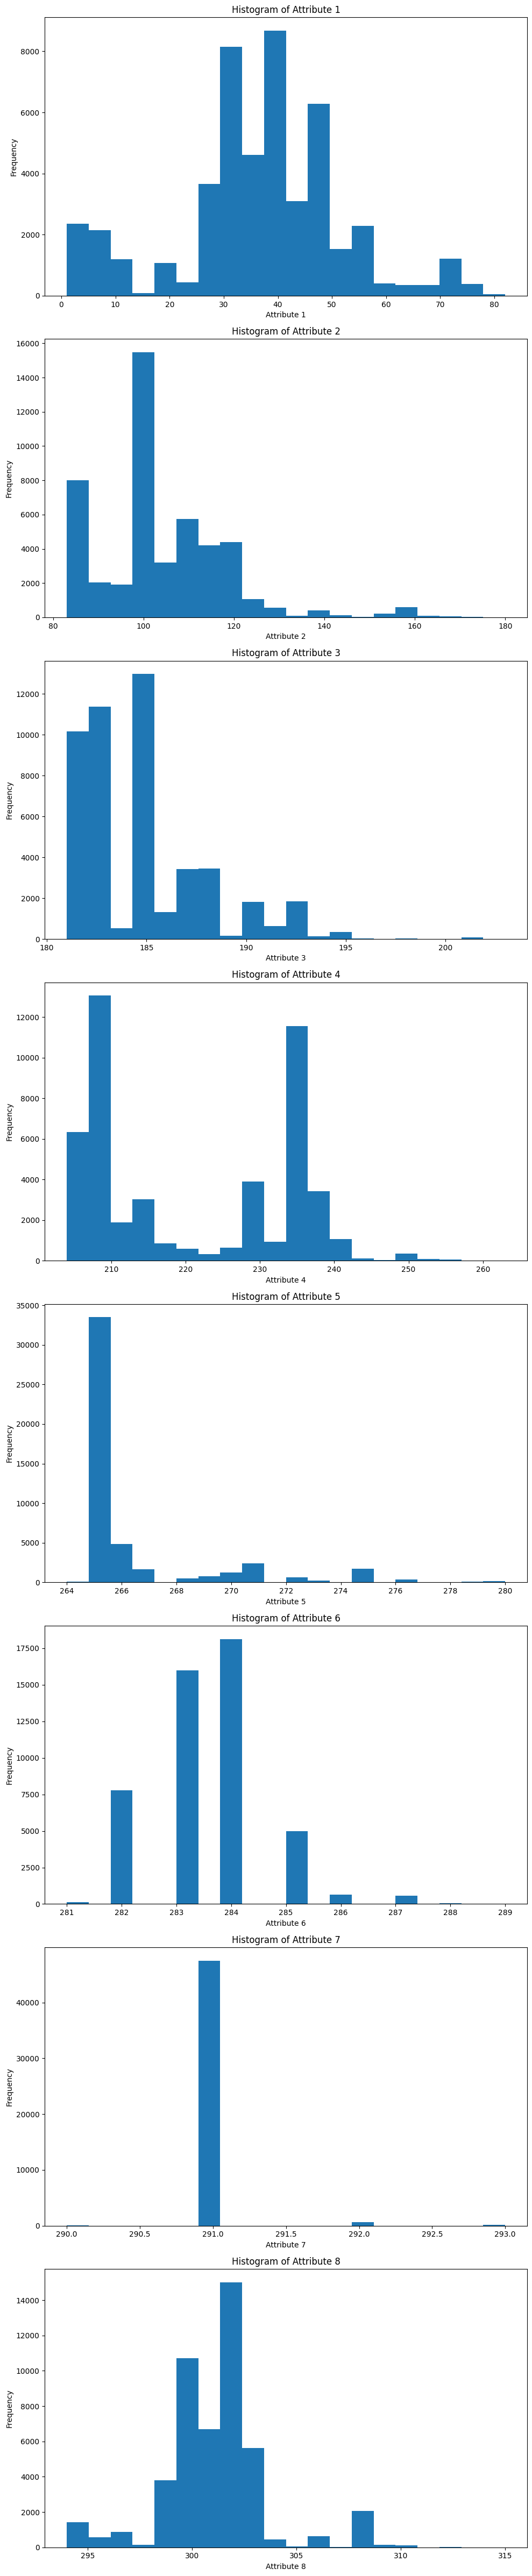

In [8]:
# prompt: subplot with histogram

import matplotlib.pyplot as plt

# Assuming 'oc' DataFrame is already loaded as in the previous code

fig, axes = plt.subplots(nrows=len(attr_cols), ncols=1, figsize=(10, 6 * len(attr_cols)))

for i, col in enumerate(attr_cols):
    axes[i].hist(oc[col].dropna(), bins=20) #dropna handles potential missing values
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
plt.tight_layout() #adjusts spacing to prevent overlap
plt.show()

In [9]:
# prompt: cd.replace({"Truck Number": "Truck"})

cd = cd.rename(columns={"Truck Number": "Truck"})

In [10]:
# prompt: merge 2 datasets on Truck and Number

merged_df = pd.merge(oc, cd, on=['Truck', 'Truck'], how='inner')
(merged_df.head())

Truck  Style  Attribute 1  Attribute 2  Attribute 3  Attribute 4  \
0      1      1            1           83          181          204   
1      1      1            1           83          181          204   
2      1      1            1           83          181          204   
3      1      1            1           83          181          204   
4      1      1            1           83          181          204   

   Attribute 5  Attribute 6  Attribute 7  Attribute 8  Claim Number  \
0          264          281          290          294        117493   
1          264          281          290          294        123346   
2          264          281          290          294         13675   
3          264          281          290          294         18104   
4          264          281          290          294         20261   

  Scale Claim Cost Scale Labor Cost  
0              Low              Low  
1        Very High         Very Low  
2              Low              Low  
3              Low              Low  
4              Low              Low

In [11]:
merged_df.shape

(123361, 13)

In [12]:
# prompt: get unique truck present in merged_df

unique_trucks = merged_df['Truck'].unique()
len(unique_trucks)

len(oc) - oc["Truck"].isin(unique_trucks).sum()

15035

In [13]:
merged_df.groupby("Truck").agg({"Claim Number": "count"}).sort_values(by="Claim Number", ascending=False)

Claim Number
Truck              
14075           101
8357             98
6695             65
19101            65
19091            61
...             ...
31941             1
13397             1
13389             1
13382             1
4647              1

[33269 rows x 1 columns]

In [14]:
merged_df[merged_df["Truck"] ==1]

Truck  Style  Attribute 1  Attribute 2  Attribute 3  Attribute 4  \
0       1      1            1           83          181          204   
1       1      1            1           83          181          204   
2       1      1            1           83          181          204   
3       1      1            1           83          181          204   
4       1      1            1           83          181          204   
5       1      1            1           83          181          204   
6       1      1            1           83          181          204   
7       1      1            1           83          181          204   
8       1      1            1           83          181          204   
9       1      1            1           83          181          204   
10      1      1            1           83          181          204   
11      1      1            1           83          181          204   

    Attribute 5  Attribute 6  Attribute 7  Attribute 8  Claim Number  \
0           264          281          290          294        117493   
1           264          281          290          294        123346   
2           264          281          290          294         13675   
3           264          281          290          294         18104   
4           264          281          290          294         20261   
5           264          281          290          294         21530   
6           264          281          290          294         21693   
7           264          281          290          294         28854   
8           264          281          290          294         29803   
9           264          281          290          294         32768   
10          264          281          290          294         85291   
11          264          281          290          294         92414   

   Scale Claim Cost Scale Labor Cost  
0               Low              Low  
1         Very High         Very Low  
2               Low              Low  
3               Low              Low  
4               Low              Low  
5               Low              Low  
6               Low              Low  
7          Very Low         Very Low  
8               Low              Low  
9               Low              Low  
10           Medium           Medium  
11              Low              Low

In [15]:
merged_df[merged_df["Truck"] ==8]

Truck  Style  Attribute 1  Attribute 2  Attribute 3  Attribute 4  \
18      8      1            3           84          182          206   
19      8      1            3           84          182          206   
20      8      1            3           84          182          206   
21      8      1            3           84          182          206   
22      8      1            3           84          182          206   
23      8      1            3           84          182          206   

    Attribute 5  Attribute 6  Attribute 7  Attribute 8  Claim Number  \
18          266          283          291          295        111266   
19          266          283          291          295        112925   
20          266          283          291          295         46201   
21          266          283          291          295         75680   
22          266          283          291          295         77219   
23          266          283          291          295         90977   

   Scale Claim Cost Scale Labor Cost  
18              Low              Low  
19              Low         Very Low  
20              Low              Low  
21              Low              Low  
22              Low              Low  
23              Low              Low

In [16]:
merged_df[(merged_df["Scale Claim Cost"] == "Very High") | (merged_df["Scale Claim Cost"] == "High")]

Truck  Style  Attribute 1  Attribute 2  Attribute 3  Attribute 4  \
1           1      1            1           83          181          204   
25         10      1            1           83          181          204   
26         10      1            1           83          181          204   
27         10      1            1           83          181          204   
176        53      1            8           85          181          206   
...       ...    ...          ...          ...          ...          ...   
122849  48056      4            1           83          185          221   
122880  48075      6           23          153          186          236   
123163  48184      7           31          103          188          237   
123171  48186      7           31          103          188          237   
123228  48224      3           39          111          185          230   

        Attribute 5  Attribute 6  Attribute 7  Attribute 8  Claim Number  \
1               264          281          290          294        123346   
25              264          281          290          294        123084   
26              264          281          290          294        123316   
27              264          281          290          294        123359   
176             266          282          291          296        123209   
...             ...          ...          ...          ...           ...   
122849          264          281          290          294        123068   
122880          265          282          291          299        122729   
123163          265          283          291          299        118769   
123171          265          283          291          299        121265   
123228          265          283          291          300        122595   

       Scale Claim Cost Scale Labor Cost  
1             Very High         Very Low  
25                 High         Very Low  
26            Very High              Low  
27            Very High           Medium  
176           Very High         Very Low  
...                 ...              ...  
122849        Very High             High  
122880             High              Low  
123163             High           Medium  
123171             High             High  
123228             High              Low  

[1921 rows x 13 columns]

In [17]:
merged_df["Scale Claim Cost"].value_counts()

Scale Claim Cost
Low          99428
Very Low     15527
Medium        6485
High          1510
Very High      411
Name: count, dtype: int64

In [18]:

# Create a new column 'High_Claim_Cost'
merged_df['High_Claim_Cost'] = np.where(merged_df['Scale Claim Cost'].isin(['Very High', 'High']), 1, 0)
# merged_df['High_Claim_Cost'] = merged_df["Scale Claim Cost"].replace({
#     "Very High": 5,
#     "High": 4,
#     "Medium": 3,
#     "Low": 2,
#     "Very Low": 1
# })

In [19]:
ndf = merged_df.drop(columns=[ "Claim Number", "Style", "Scale Claim Cost", "Scale Labor Cost"])

In [20]:
ndf.head()

Truck  Attribute 1  Attribute 2  Attribute 3  Attribute 4  Attribute 5  \
0      1            1           83          181          204          264   
1      1            1           83          181          204          264   
2      1            1           83          181          204          264   
3      1            1           83          181          204          264   
4      1            1           83          181          204          264   

   Attribute 6  Attribute 7  Attribute 8  High_Claim_Cost  
0          281          290          294                0  
1          281          290          294                1  
2          281          290          294                0  
3          281          290          294                0  
4          281          290          294                0

In [21]:
ndf.shape

(123361, 10)

In [22]:
# remove duplicates

ndf2 = ndf.drop_duplicates()

In [23]:
ndf2.shape

(34826, 10)

In [24]:
ndf2.head()

Truck  Attribute 1  Attribute 2  Attribute 3  Attribute 4  Attribute 5  \
0       1            1           83          181          204          264   
1       1            1           83          181          204          264   
12      2            2           84          181          205          265   
14      4            2           84          181          205          265   
16      5            2           84          181          205          265   

    Attribute 6  Attribute 7  Attribute 8  High_Claim_Cost  
0           281          290          294                0  
1           281          290          294                1  
12          282          291          295                0  
14          282          291          295                0  
16          282          291          295                0

In [25]:
indep = ndf2.drop(columns=["High_Claim_Cost"])
dep = ndf2[["Truck", "High_Claim_Cost"]]

In [26]:
df1 = ndf.groupby("Truck").agg({"High_Claim_Cost": "max"}).reset_index()
df1.High_Claim_Cost.value_counts()

High_Claim_Cost
0    31598
1     1671
Name: count, dtype: int64

In [27]:
# prompt: join df1 and ndf on Truck

df_joined = pd.merge(df1, ndf, on='Truck', how='inner')

In [28]:
df_joined.shape

(123361, 11)

In [29]:
newdf = df_joined.drop(["High_Claim_Cost_y"], axis = 1)

newdf.drop_duplicates(inplace=True)
newdf.shape

(33269, 10)

In [30]:
newdf.head()

Truck  High_Claim_Cost_x  Attribute 1  Attribute 2  Attribute 3  \
0       1                  1            1           83          181   
12      2                  0            2           84          181   
14      4                  0            2           84          181   
16      5                  0            2           84          181   
18      8                  0            3           84          182   

    Attribute 4  Attribute 5  Attribute 6  Attribute 7  Attribute 8  
0           204          264          281          290          294  
12          205          265          282          291          295  
14          205          265          282          291          295  
16          205          265          282          291          295  
18          206          266          283          291          295

In [31]:
newdf.High_Claim_Cost_x.value_counts()

High_Claim_Cost_x
0    31598
1     1671
Name: count, dtype: int64

In [32]:
newdf2 = newdf.drop(["Truck"], axis =1)
newdf2.drop_duplicates(inplace=True)
newdf2.shape

(6469, 9)

In [33]:
newdf2.rename(columns={"High_Claim_Cost_x": "High_Claim_Cost"}, inplace=True)

In [34]:
# prompt: change datatype of attr_cols to category

for col in attr_cols:
    newdf2[col] = newdf2[col].astype('category')

In [35]:
newdf2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6469 entries, 0 to 123358
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   High_Claim_Cost  6469 non-null   int64   
 1   Attribute 1      6469 non-null   category
 2   Attribute 2      6469 non-null   category
 3   Attribute 3      6469 non-null   category
 4   Attribute 4      6469 non-null   category
 5   Attribute 5      6469 non-null   category
 6   Attribute 6      6469 non-null   category
 7   Attribute 7      6469 non-null   category
 8   Attribute 8      6469 non-null   category
dtypes: category(8), int64(1)
memory usage: 162.2 KB


In [36]:
newdf2.High_Claim_Cost.value_counts()

High_Claim_Cost
0    5760
1     709
Name: count, dtype: int64

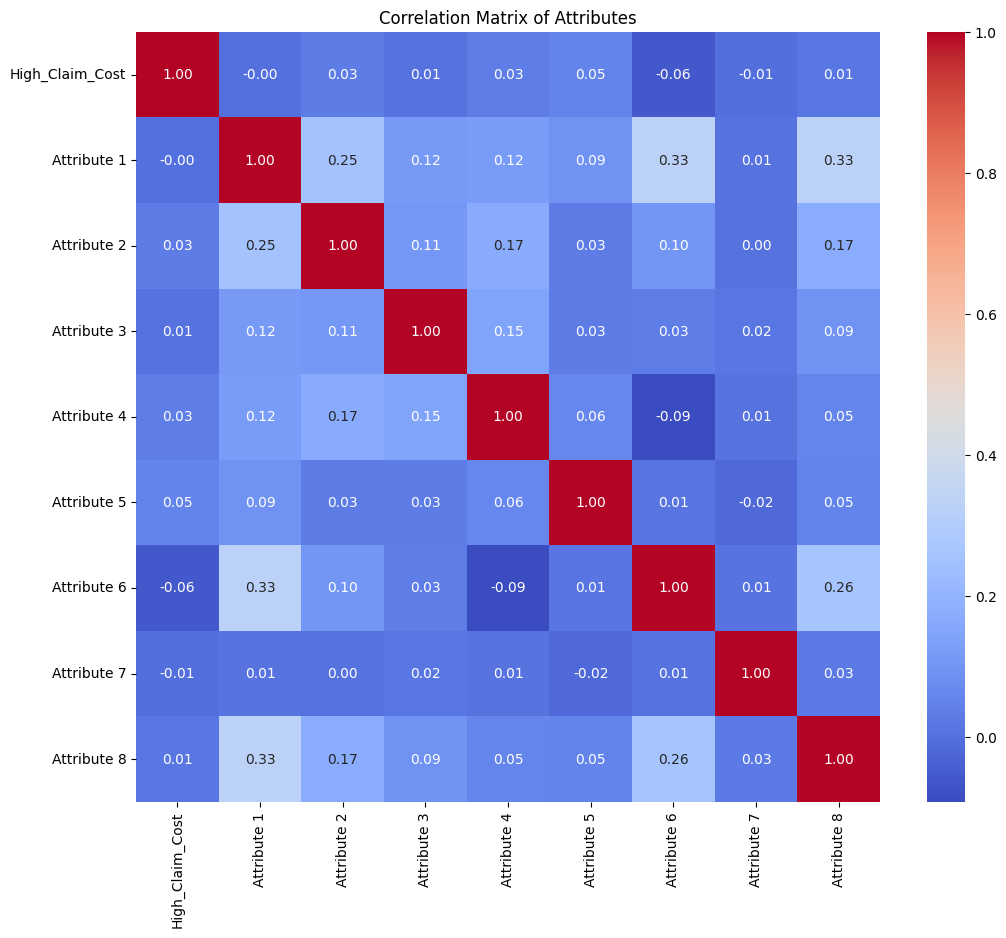

In [45]:
# prompt: correlation plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'ndf' DataFrame is already loaded and processed as in the previous code

# Calculate the correlation matrix
correlation_matrix = newdf2.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Attributes')
plt.show()

Truck  Style  Attribute 1  Attribute 2  Attribute 3  Attribute 4  \
104847  39726      3           82          110          183          207   
104845  39726      3           82          110          183          207   
104855  39730      3           82          110          183          207   
104854  39729      3           82          110          183          207   
104853  39729      3           82          110          183          207   
...       ...    ...          ...          ...          ...          ...   
83273   29586      4            1           83          185          221   
83272   29586      4            1           83          185          221   
83271   29586      4            1           83          185          221   
83270   29586      4            1           83          185          221   
1           1      1            1           83          181          204   

        Attribute 5  Attribute 6  Attribute 7  Attribute 8  Claim Number  \
104847          265          283          291          300         95573   
104845          265          283          291          300         39002   
104855          265          283          291          300           561   
104854          265          283          291          300         72219   
104853          265          283          291          300         60348   
...             ...          ...          ...          ...           ...   
83273           264          281          290          294        122988   
83272           264          281          290          294        122987   
83271           264          281          290          294        122453   
83270           264          281          290          294        122452   
1               264          281          290          294        123346   

       Scale Claim Cost Scale Labor Cost  High_Claim_Cost  
104847              Low              Low                0  
104845              Low         Very Low                0  
104855         Very Low         Very Low                0  
104854              Low              Low                0  
104853              Low              Low                0  
...                 ...              ...              ...  
83273              High              Low                1  
83272         Very High           Medium                1  
83271              High         Very Low                1  
83270              High         Very Low                1  
1             Very High         Very Low                1  

[123361 rows x 14 columns]

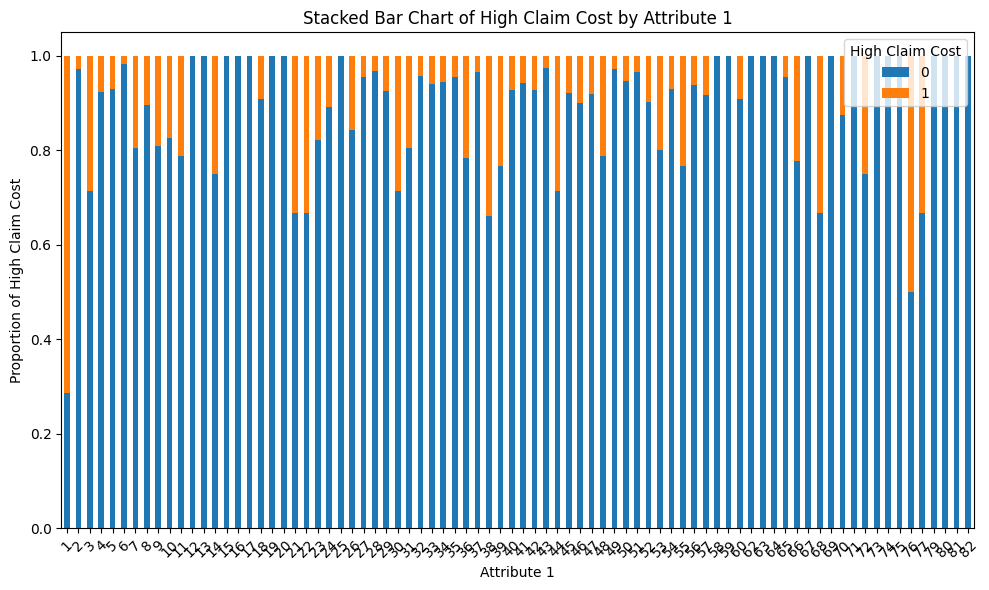

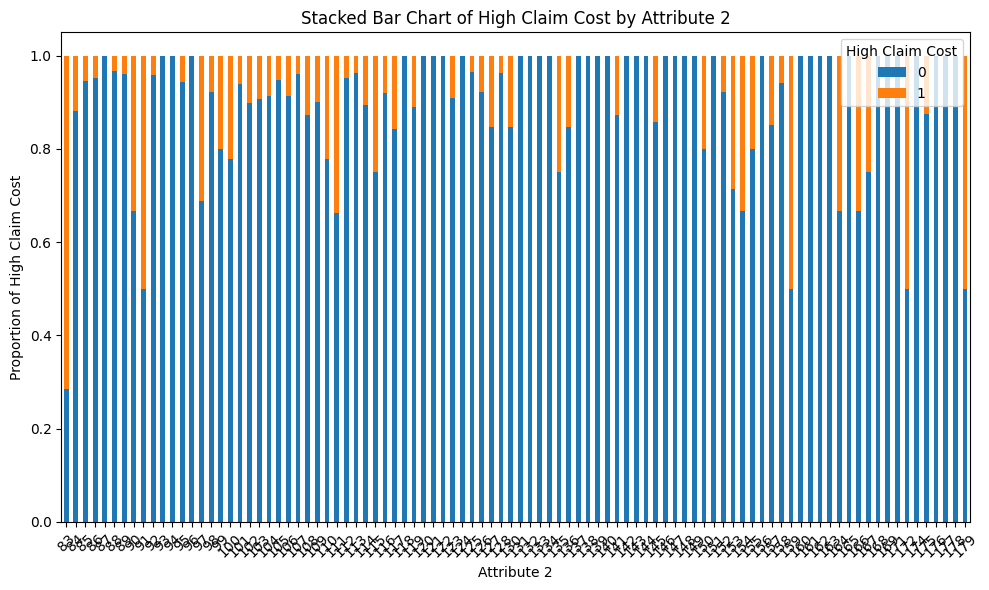

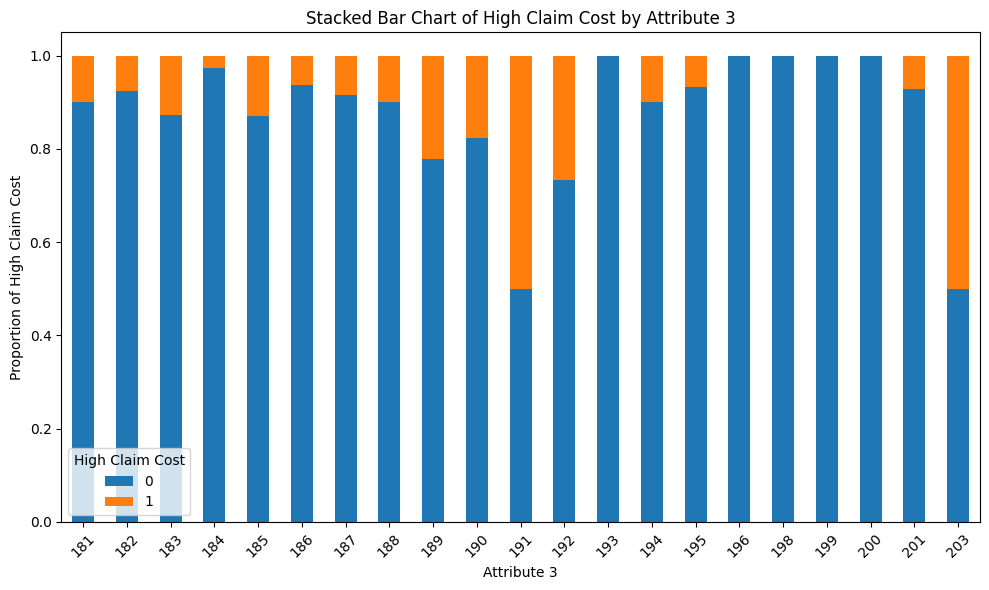

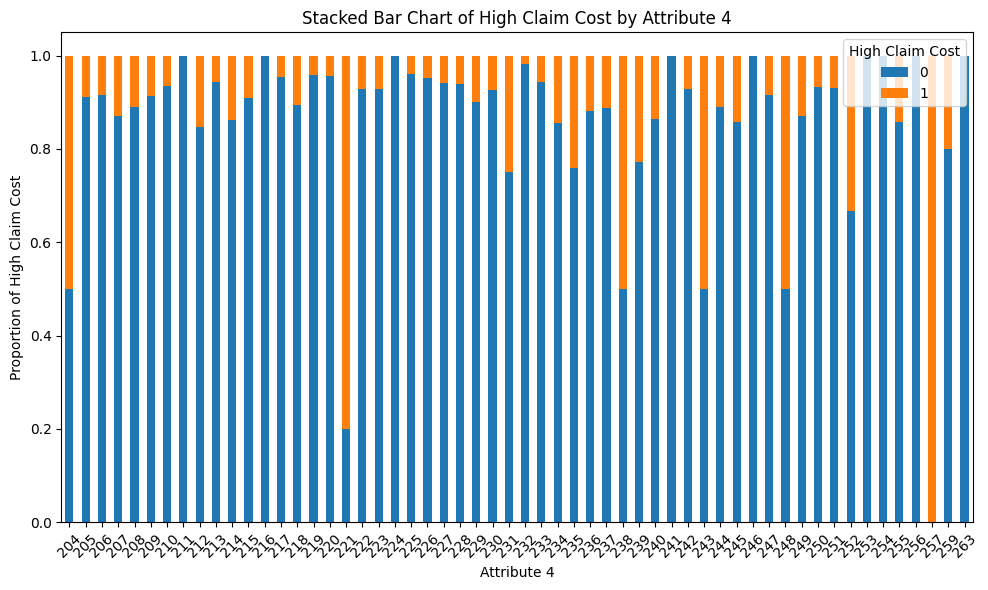

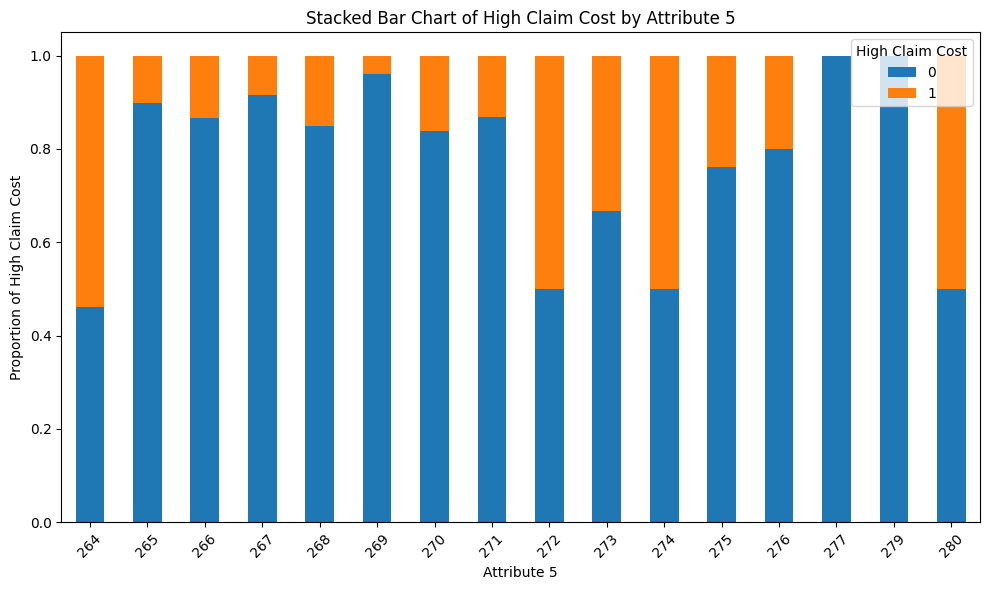

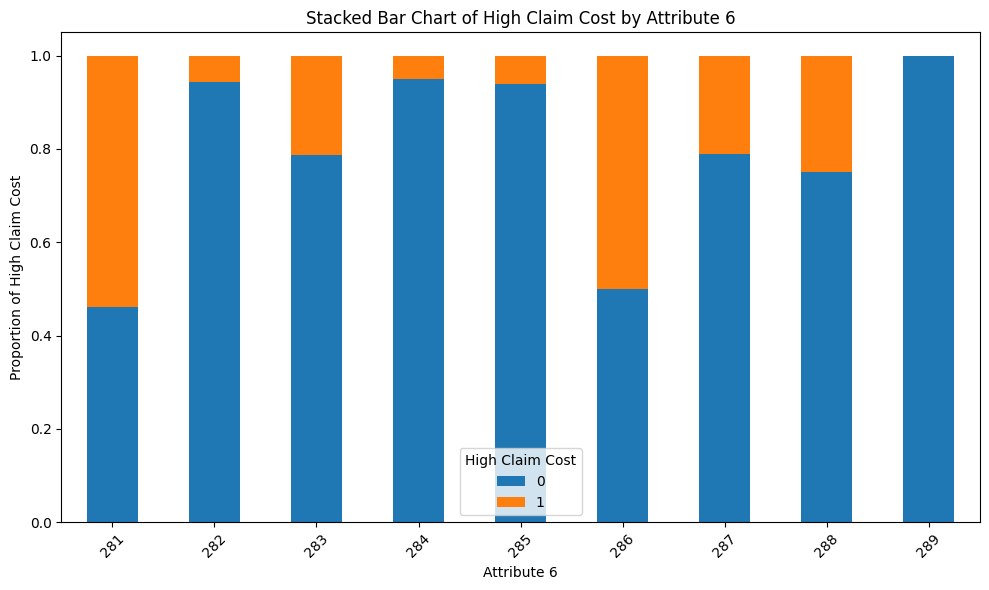

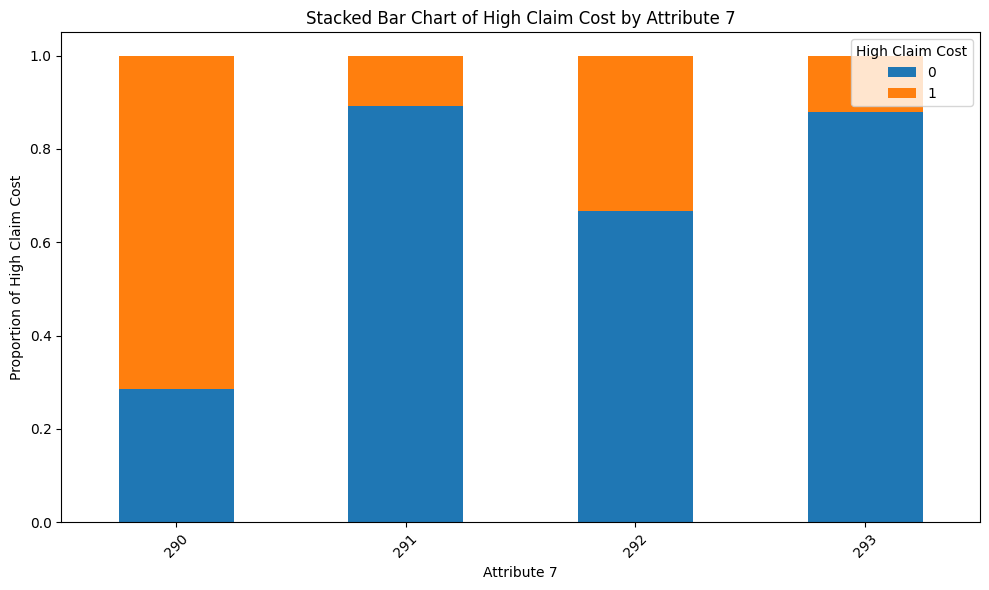

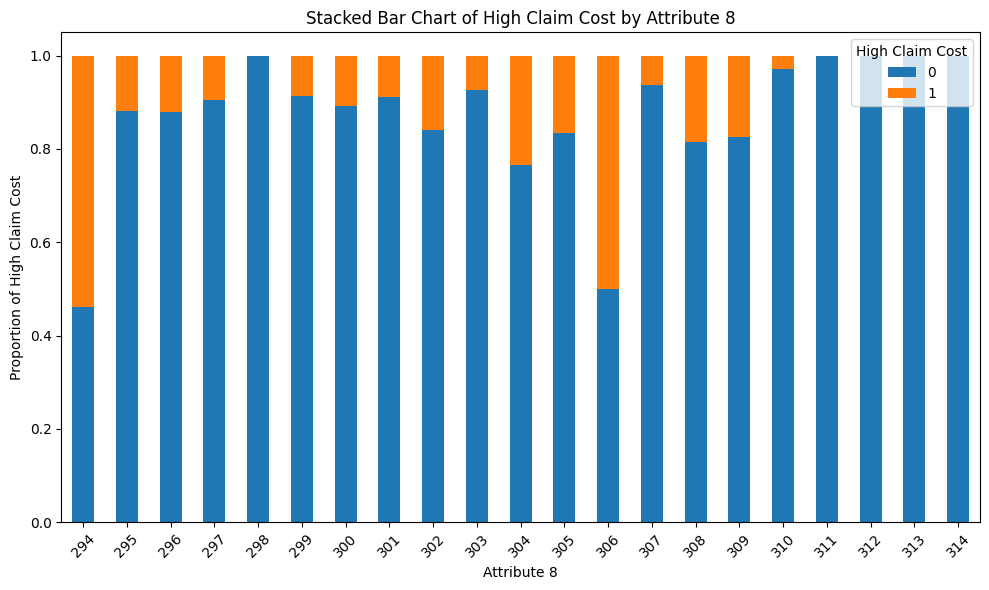

In [81]:
# prompt: stacked bar chart ndf2 variable

import matplotlib.pyplot as plt

# Assuming 'newdf2' and 'attr_cols' are defined as in the previous code

# Create the stacked bar chart
for col in attr_cols:
    stacked_data = newdf2.groupby(col)['High_Claim_Cost'].value_counts(normalize=True).unstack()
    stacked_data.plot(kind='bar', stacked=True, figsize=(10,6))
    plt.title(f'Stacked Bar Chart of High Claim Cost by {col}')
    plt.xlabel(col)
    plt.ylabel('Proportion of High Claim Cost')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend(title='High Claim Cost')
    plt.tight_layout()
    plt.show()

In [38]:
# prompt: get_dummies for attr_cols

# Assuming 'newdf2' DataFrame is already created as in the previous code
# and 'attr_cols' list contains the attribute columns

newdf2_enc = pd.get_dummies(newdf2, columns=attr_cols, drop_first=True, dtype=int)
newdf2_enc.head()

High_Claim_Cost  Attribute 1_2  Attribute 1_3  Attribute 1_4  \
0                 1              0              0              0   
12                0              1              0              0   
18                0              0              1              0   
34                0              0              0              0   
41                0              0              0              0   

    Attribute 1_5  Attribute 1_6  Attribute 1_7  Attribute 1_8  Attribute 1_9  \
0               0              0              0              0              0   
12              0              0              0              0              0   
18              0              0              0              0              0   
34              0              0              0              0              0   
41              1              0              0              0              0   

    Attribute 1_10  ...  Attribute 8_305  Attribute 8_306  Attribute 8_307  \
0                0  ...                0                0                0   
12               0  ...                0                0                0   
18               0  ...                0                0                0   
34               0  ...                0                0                0   
41               0  ...                0                0                0   

    Attribute 8_308  Attribute 8_309  Attribute 8_310  Attribute 8_311  \
0                 0                0                0                0   
12                0                0                0                0   
18                0                0                0                0   
34                0                0                0                0   
41                0                0                0                0   

    Attribute 8_312  Attribute 8_313  Attribute 8_314  
0                 0                0                0  
12                0                0                0  
18                0                0                0  
34                0                0                0  
41                0                0                0  

[5 rows x 294 columns]

In [39]:
# prompt: SMOTE

# Assuming 'ndf' DataFrame is already created as in the previous code
from imblearn.over_sampling import SMOTE

# Separate features (X) and target (y)
X = newdf2_enc.drop('High_Claim_Cost', axis=1)
y = newdf2_enc['High_Claim_Cost']

# Initialize SMOTE
smote = SMOTE(random_state=42)  # You can adjust the random_state

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['High_Claim_Cost'] = y_resampled

# Now 'resampled_df' contains the oversampled data
print(resampled_df['High_Claim_Cost'].value_counts())

High_Claim_Cost
1    5760
0    5760
Name: count, dtype: int64


<ipython-input-39-5165f4e9a007>:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  resampled_df['High_Claim_Cost'] = y_resampled


In [41]:
# prompt: train test split

from sklearn.model_selection import train_test_split

# Assuming 'resampled_df' is your DataFrame after SMOTE
X = resampled_df.drop('High_Claim_Cost', axis=1)
y = resampled_df['High_Claim_Cost']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size as needed

# Now you have X_train, X_test, y_train, and y_test for model training and evaluation
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9216, 293) (2304, 293) (9216,) (2304,)


In [84]:
# prompt: decision tree classification

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42, max_depth= 5)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
conf_matrix

# You can further visualize the decision tree using:
# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20,10))
# plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Low/Medium Claim Cost', 'High Claim Cost'], rounded=True)
# plt.show()

Accuracy: 0.6809895833333334
              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1175
           1       0.69      0.63      0.66      1129

    accuracy                           0.68      2304
   macro avg       0.68      0.68      0.68      2304
weighted avg       0.68      0.68      0.68      2304

Confusion Matrix:


array([[856, 319],
       [416, 713]])

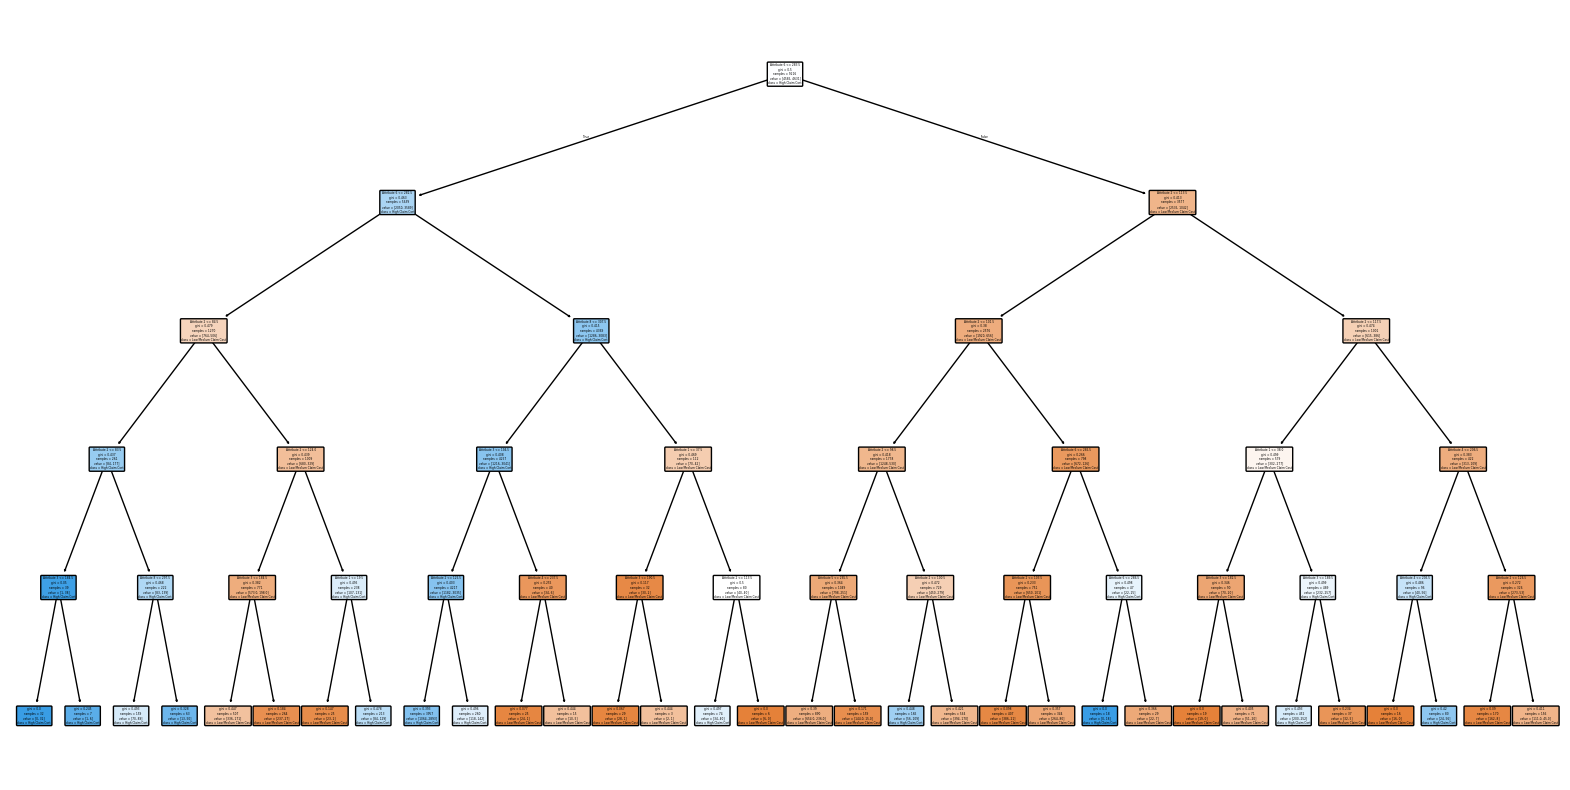

In [ ]:
# prompt: plot tree

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Low/Medium Claim Cost', 'High Claim Cost'], rounded=True)
plt.show()

In [ ]:
# prompt: randomforest classificer with grid search

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Assuming X_train, X_test, y_train, y_test are already defined from the previous code

# Define the parameter grid for RandomForestClassifier
param_grid = {
    # 'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [ 12],     # Maximum depth of the trees
    # 'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    # 'min_samples_leaf': [1, 2, 4]   # Minimum number of samples required to be at a leaf node
}

# Initialize the RandomForestClassifier
# rf_classifier = RandomForestClassifier(random_state=42)
dtc = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Best parameters: {'max_depth': 12}
Best cross-validation score: 0.7431648507632209
Test set accuracy: 0.7400173611111112
              precision    recall  f1-score   support

           0       0.74      0.75      0.75      1175
           1       0.74      0.73      0.73      1129

    accuracy                           0.74      2304
   macro avg       0.74      0.74      0.74      2304
weighted avg       0.74      0.74      0.74      2304



In [ ]:
# prompt: randomforest classificer with grid search

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Assuming X_train, X_test, y_train, y_test are already defined from the previous code

# Define the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [ 12],     # Maximum depth of the trees
    # 'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    # 'min_samples_leaf': [1, 2, 4]   # Minimum number of samples required to be at a leaf node
}

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
# dtc = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


Best parameters: {'max_depth': 12, 'n_estimators': 200}
Best cross-validation score: 0.8021561811075891
Test set accuracy: 0.804867634500427
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1197
           1       0.77      0.87      0.81      1145

    accuracy                           0.80      2342
   macro avg       0.81      0.81      0.80      2342
weighted avg       0.81      0.80      0.80      2342



/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


In [ ]:
newdf2.head()

High_Claim_Cost Attribute 1 Attribute 2 Attribute 3 Attribute 4  \
0                 1           1          83         181         204   
12                0           2          84         181         205   
18                0           3          84         182         206   
34                0           1          83         181         204   
41                0           5          84         182         208   

   Attribute 5 Attribute 6 Attribute 7 Attribute 8  
0          264         281         290         294  
12         265         282         291         295  
18         266         283         291         295  
34         264         281         290         294  
41         265         282         291         295

In [85]:
# prompt: XGBoost modeling

# Assuming necessary libraries are already imported and data is preprocessed as in the provided code.

import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42, enable_categorical = True)

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [ 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    # Add other hyperparameters to tune
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_xgb_classifier = grid_search.best_estimator_
y_pred = best_xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best cross-validation score: 0.8664279333304302
Test set accuracy: 0.875
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1175
           1       0.84      0.93      0.88      1129

    accuracy                           0.88      2304
   macro avg       0.88      0.88      0.87      2304
weighted avg       0.88      0.88      0.87      2304



Test set accuracy: 0.875
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1175
           1       0.84      0.93      0.88      1129

    accuracy                           0.88      2304
   macro avg       0.88      0.88      0.87      2304
weighted avg       0.88      0.88      0.87      2304



<Axes: >

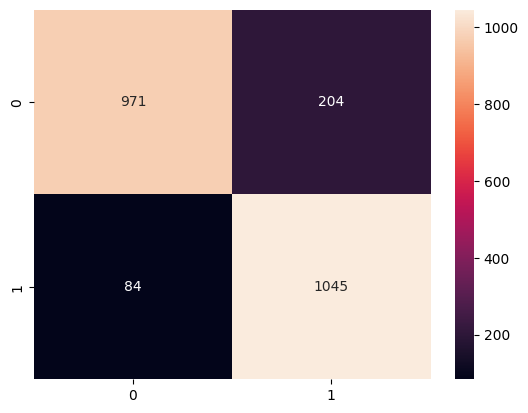

In [87]:
# confusion matrix plot

from sklearn.metrics import confusion_matrix
import seaborn as sns
best_xgb_classifier = grid_search.best_estimator_
y_pred = best_xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy}")

print(classification_report(y_test, y_pred))


sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')

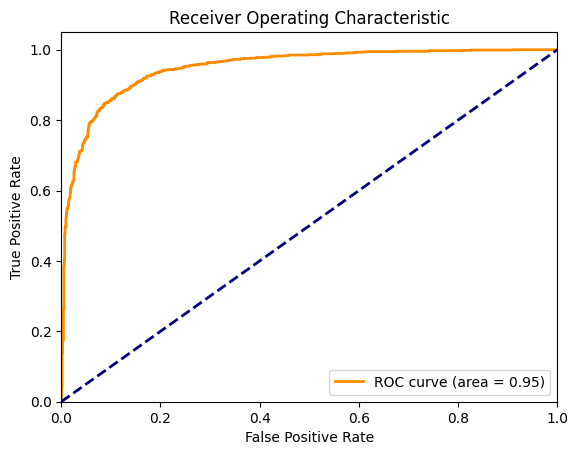

In [88]:
# prompt: AUC curve

from sklearn.metrics import roc_curve, auc

# Assuming best_xgb_classifier and X_test, y_test are defined from the previous code

# Predict probabilities for the positive class
y_prob = best_xgb_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [83]:
# prompt: best_xgb_classifier.feature_importances_ with columns

# Get feature importances
importances = best_xgb_classifier.feature_importances_

# Create a DataFrame to display feature importances with column names
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print or display the DataFrame
feature_importances_df.head(20)

Feature  Importance
263  Attribute 6_283    0.045632
251  Attribute 5_269    0.020007
267  Attribute 6_287    0.019976
121  Attribute 2_126    0.019322
174  Attribute 3_184    0.018991
272  Attribute 7_293    0.017098
81    Attribute 2_86    0.016301
262  Attribute 6_282    0.016039
102  Attribute 2_107    0.014385
47    Attribute 1_49    0.013654
17    Attribute 1_19    0.013330
217  Attribute 4_230    0.012064
224  Attribute 4_237    0.012014
253  Attribute 5_271    0.011911
206  Attribute 4_219    0.011883
4      Attribute 1_6    0.011671
249  Attribute 5_267    0.011456
229  Attribute 4_242    0.010921
103  Attribute 2_108    0.010849
0      Attribute 1_2    0.010715

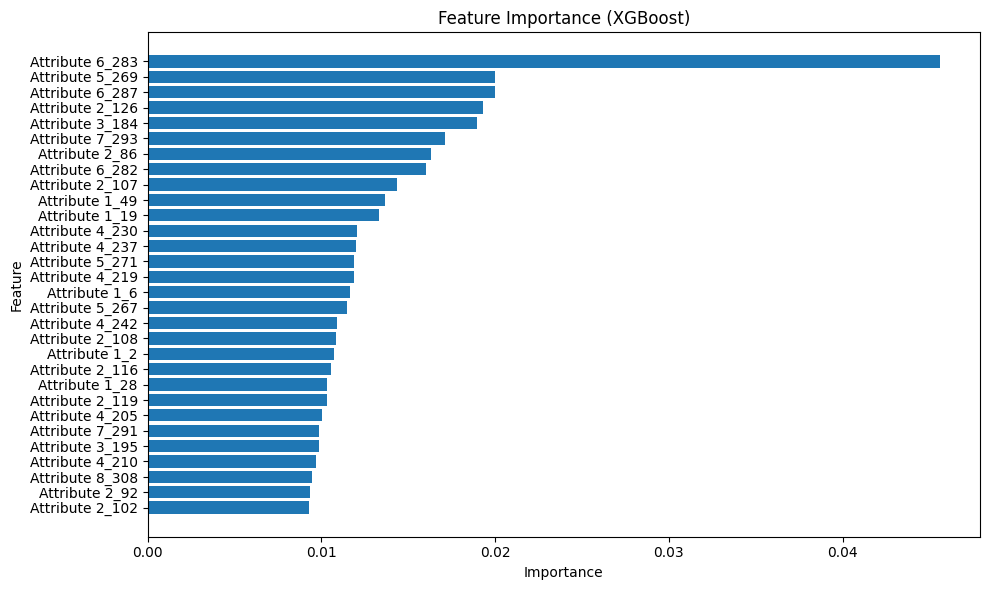

In [91]:
# prompt: bar plot for feature importance

import matplotlib.pyplot as plt

# Assuming feature_importances_df is already created as in your previous code

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(feature_importances_df['Feature'][:30], feature_importances_df['Importance'][:30]) # top 20 features
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (XGBoost)")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

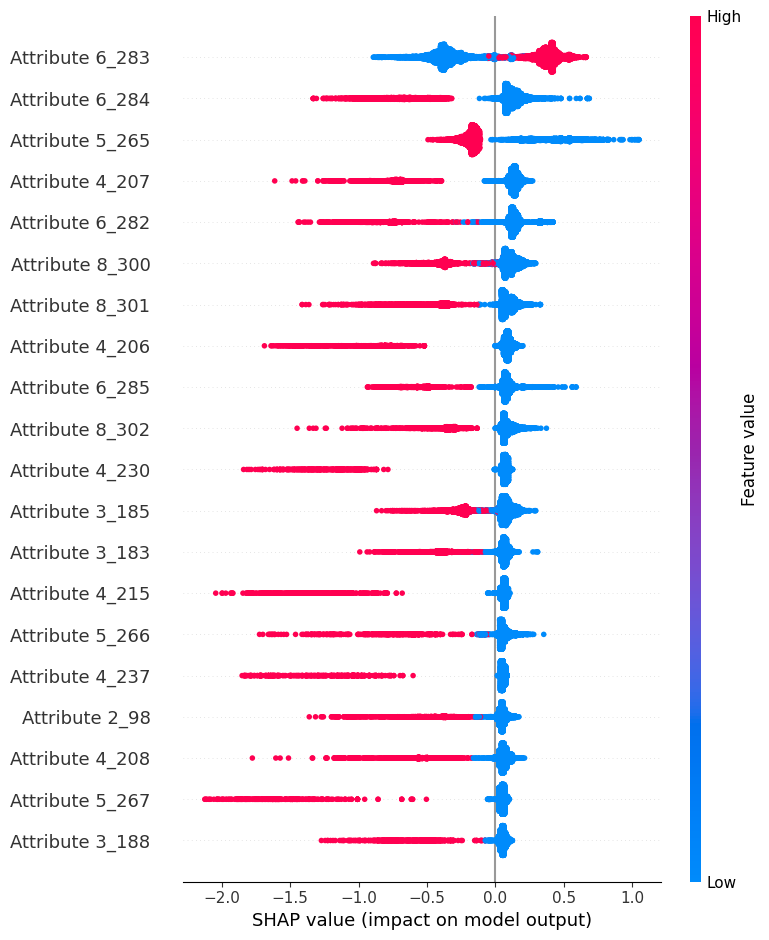

In [74]:
import shap

explainer = shap.TreeExplainer(best_xgb_classifier)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)


In [ ]:
ndf.head()

Attribute 1 Attribute 2 Attribute 3 Attribute 4 Attribute 5 Attribute 6  \
0            1          83         181         204         264         281   
1            1          83         181         204         264         281   
12           2          84         181         205         265         282   
18           3          84         182         206         266         283   
41           5          84         182         208         265         282   

   Attribute 7 Attribute 8  High_Claim_Cost  cluster  
0          290         294                0        2  
1          290         294                1        2  
12         291         295                0        2  
18         291         295                0        2  
41         291         295                0        2

In [75]:


explainer = shap.Explainer(best_xgb_classifier)
shap_values = explainer(X_train)
# shap.summary_plot(shap_values, X_train)


In [76]:
np.shape(shap_values.values)

(9216, 293)

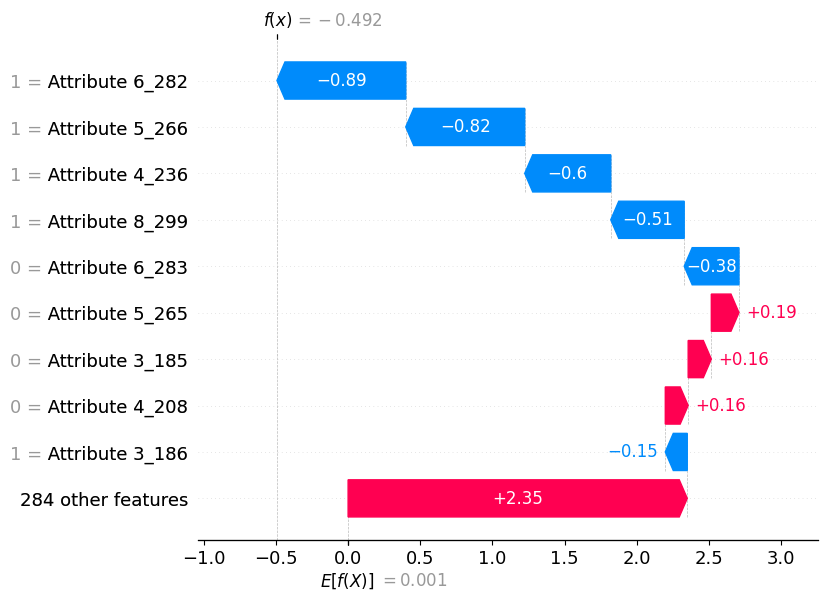

In [99]:
shap.plots.waterfall(shap_values[500])

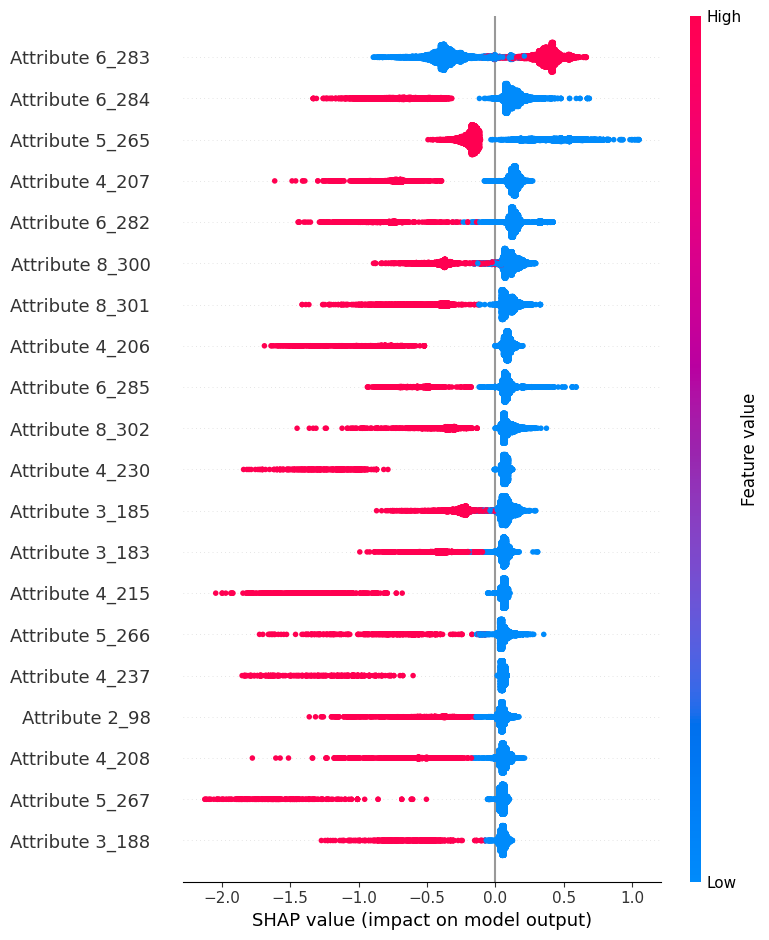

In [102]:
# prompt: shap value with feature names

shap.summary_plot(shap_values, X_train, feature_names = X_train.columns)

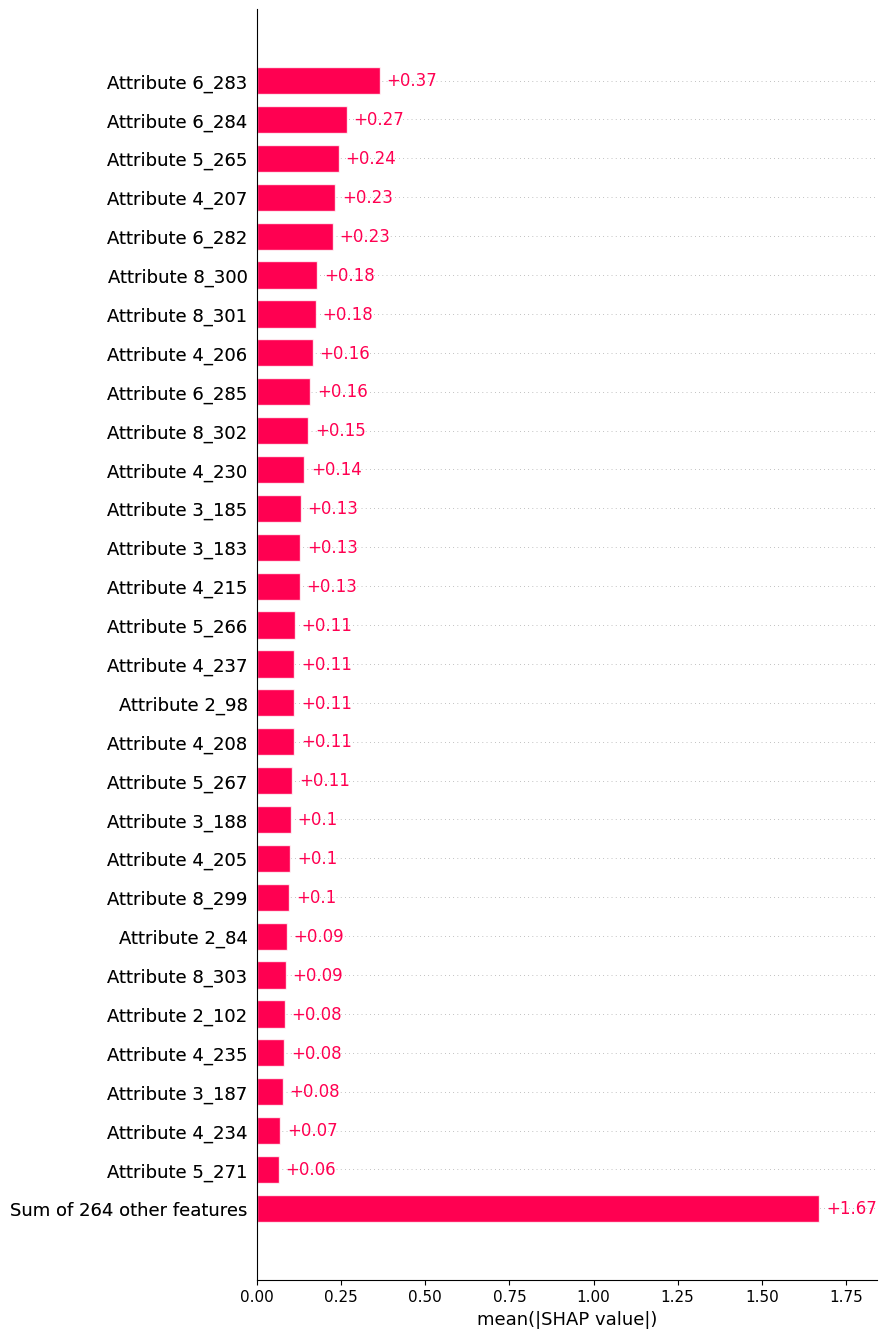

In [100]:
shap.plots.bar(shap_values, max_display=30)

In [80]:
shap.initjs()
shap.plots.force(shap_values[:100])

In [ ]:
best_xgb_classifier.get_booster().dump_model('xgb_model.txt', with_stats=True)
# read the contents of the file
with open('xgb_model.txt', 'r') as f:
    txt_model = f.read()
print(txt_model)

booster[0]:
0:[Attribute 6:{1,3,4,6,7,8}] yes=2,no=1,missing=1,gain=1443.45288,cover=2341.42773
	1:[Attribute 2:{1,2,3,4,5,7,8,9,10,11,12,13,15,17,20,21,23,24,25,32,33,36,37,38,40,41,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93}] yes=4,no=3,missing=4,gain=188.821167,cover=1141.96484
		3:[Attribute 2:{1,2,3,4,5,7,8,9,10,11,12,13,14,15,17,19,20,21,23,24,25,26,28,30,32,33,36,37,38,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93}] yes=8,no=7,missing=8,gain=43.2406006,cover=500.984558
			7:[Attribute 8:{0,1,2,3,4,5,9,10,11,12,13,14,15,16,17,18,19,20}] yes=16,no=15,missing=15,gain=0.906433105,cover=120.246292
				15:[Attribute 4:{0,5,6,7,8,9,12}] yes=30,no=29,missing=29,gain=2.82949829,cover=81.2474976
					29:leaf=0.192736357,cover=79.9975357
					30:leaf=0.0216057114,cover=1.24

In [ ]:
import re
# trying to extract all patterns like "[f2<2.45]"
splits = re.findall('\[f([0-9]+)<([0-9]+.[0-9]+)\]', txt_model)
splits

[]

In [ ]:
# prompt: LightGBM

# Assuming necessary libraries are already imported and data is preprocessed as in the provided code.
import lightgbm as lgb

# Initialize the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(random_state=42)

# Define the parameter grid for LightGBM
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    # 'num_leaves': [31, 50],
    # Add other hyperparameters to tune
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=lgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_lgb_classifier = grid_search.best_estimator_
y_pred = best_lgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4631, number of negative: 4585
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 292
[LightGBM] [Info] Number of data points in the train set: 9216, number of used features: 146
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502496 -> initscore=0.009983
[LightGBM] [Info] Start training from score 0.009983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [ ]:
# prompt: catboost

# Assuming necessary libraries are already imported and data is preprocessed as in the provided code.
from catboost import CatBoostClassifier

# for col in attr_cols:
#     newdf2[col] = newdf2[col].astype('int16')


# Initialize the CatBoost classifier
catboost_classifier = CatBoostClassifier( random_state=42, verbose=0) # verbose=0 suppresses training output

# Define the parameter grid for CatBoost
param_grid = {
    'iterations': [100, 200],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1],
    # Add other hyperparameters to tune
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=catboost_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train, cat_features=range(len(X_train.columns)))




Best parameters: {'depth': 8, 'iterations': 200, 'learning_rate': 0.1}
Best cross-validation score: 0.8708770831298118


CatBoostError: Invalid cat_features[8] = 8 value: index must be < 8.

In [ ]:
# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_catboost_classifier = grid_search.best_estimator_
y_pred = best_catboost_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Best parameters: {'depth': 8, 'iterations': 200, 'learning_rate': 0.1}
Best cross-validation score: 0.8708770831298118
Test set accuracy: 0.8719618055555556
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1175
           1       0.84      0.91      0.87      1129

    accuracy                           0.87      2304
   macro avg       0.87      0.87      0.87      2304
weighted avg       0.88      0.87      0.87      2304



In [ ]:
list(range(len(X_train.columns)))

[0, 1, 2, 3, 4, 5, 6, 7]

In [ ]:
# prompt: random forest 'max_depth': 5, 'n_estimators': 300

# Assuming X_train, X_test, y_train, y_test are already defined from the previous code

# Initialize the RandomForestClassifier with specified parameters\

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42, max_depth=5, n_estimators=300)

# Train the classifier
gbc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


Test set accuracy: 0.8257899231426131
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1197
           1       0.80      0.85      0.83      1145

    accuracy                           0.83      2342
   macro avg       0.83      0.83      0.83      2342
weighted avg       0.83      0.83      0.83      2342



/usr/local/lib/python3.10/dist-packages/pandas/core/arrays/base.py:568: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


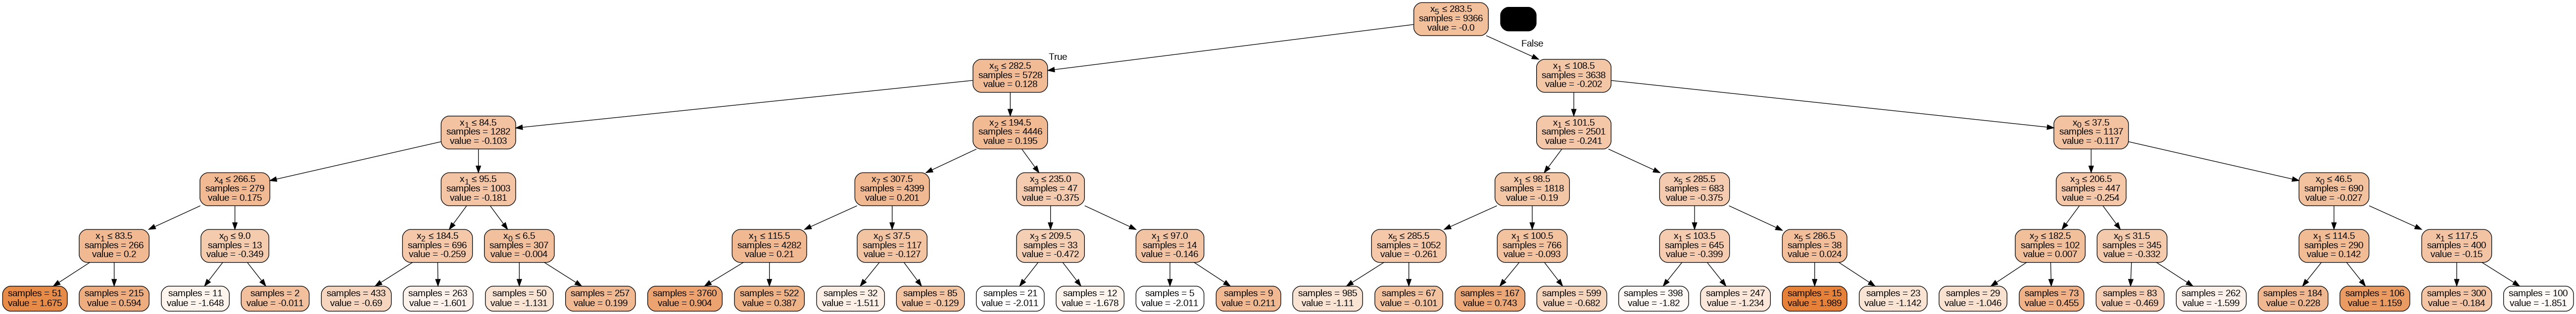

In [ ]:
from pydotplus import graph_from_dot_data
from IPython.display import Image
from sklearn.tree import export_graphviz

sub_tree_42 = gbc.estimators_[0, 0]

dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)
graph = graph_from_dot_data(dot_data)
png = graph.create_png()
# Save (optional)
from pathlib import Path
Path('./out.png').write_bytes(png)
# Display
Image(png)

In [ ]:
# prompt: feature imp with cols

# Get feature importances
importances = gbc.feature_importances_

# Create a DataFrame to display feature importances with column names
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print or display the DataFrame
feature_importances_df

Feature  Importance
5  Attribute 6    0.288607
1  Attribute 2    0.207745
0  Attribute 1    0.146787
3  Attribute 4    0.124528
2  Attribute 3    0.107759
7  Attribute 8    0.071618
4  Attribute 5    0.043894
6  Attribute 7    0.009062

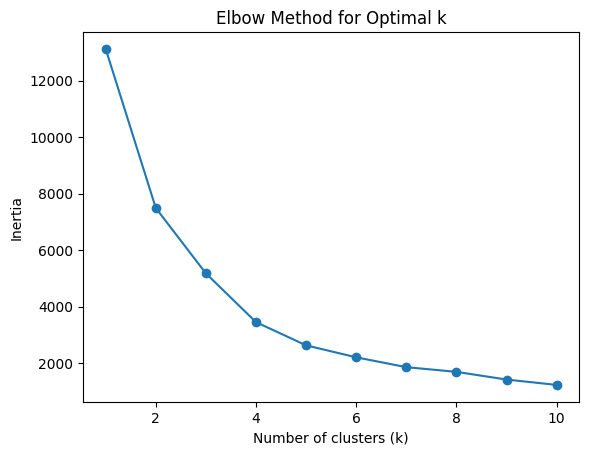

In [ ]:
# prompt: clustering algorithms

from sklearn.cluster import KMeans

# Assuming 'ndf' DataFrame is available (from previous code)
# and 'High_Claim_Cost' is the target variable you want to predict.

# Select features for clustering (excluding the target variable)
X_cluster = ndf.drop('High_Claim_Cost', axis=1)

# remove duplicates
# X_cluster.drop_duplicates(inplace=True)

# PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_cluster = pca.fit_transform(X_cluster)

# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_cluster = scaler.fit_transform(X_cluster)

# Determine the optimal number of clusters (e.g., using the Elbow method)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()



In [ ]:
# Based on the Elbow method plot, choose the optimal k
optimal_k = 4  # Replace with the value obtained from the plot



# Apply KMeans clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
ndf['cluster'] = kmeans.fit_predict(X_cluster)

# Analyze the clusters
print(ndf.groupby('cluster')['High_Claim_Cost'].value_counts(normalize=True))

# Visualize clusters (example for 2D visualization, adjust for more features)
if X_cluster.shape[1] == 2:
  plt.scatter(X_cluster.iloc[:, 0], X_cluster.iloc[:, 1], c=ndf['cluster'])
  plt.title('KMeans Clustering')
  plt.show()

# You can use other clustering algorithms like DBSCAN or hierarchical clustering
# and explore cluster characteristics with different metrics.

cluster  High_Claim_Cost
0        0                  0.902545
         1                  0.097455
1        0                  0.871248
         1                  0.128752
2        0                  0.908267
         1                  0.091733
3        0                  0.896203
         1                  0.103797
Name: proportion, dtype: float64


array([[-2.45937693, -1.30874366, -1.19017924, ..., -5.64545608,
        -3.13187769, -0.1544668 ],
       [-2.38584874, -1.2456889 , -1.19017924, ..., -0.08438791,
        -2.68790547, -0.1544668 ],
       [-2.31232055, -1.2456889 , -0.89160354, ..., -0.08438791,
        -2.68790547, -0.1544668 ],
       ...,
       [-0.18000303, -0.17375805, -0.29445215, ..., -0.08438791,
        -0.02407215,  0.73284738],
       [ 0.04058154, -0.36292232, -0.89160354, ..., -0.08438791,
        -0.02407215,  0.73284738],
       [ 0.11410973,  0.77206329, -1.19017924, ..., -0.08438791,
        -0.02407215,  0.73284738]])

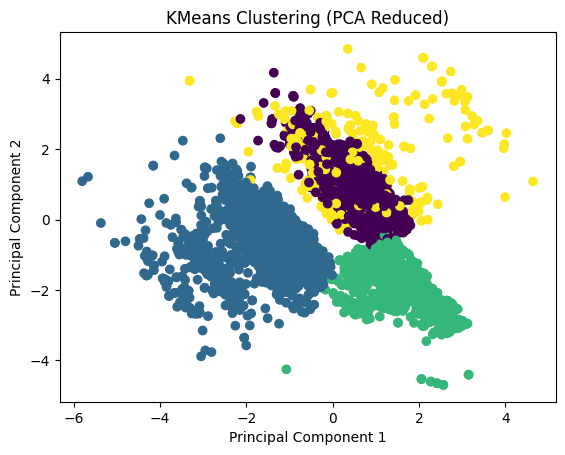

In [ ]:
# prompt: plot clusters

# Visualize clusters (example for 2D visualization, adjust for more features)
if X_cluster.shape[1] > 2:
    # Use PCA to reduce dimensionality for visualization
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_cluster)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=ndf['cluster'])
    plt.title('KMeans Clustering (PCA Reduced)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()